In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import seaborn as sns
import statsmodels.api as sn

In [5]:
df = pd.read_csv('/Users/dikshantthapa/PycharmProjects/pythonProject/Data Files/day1/House_Price.csv')

In [6]:
df.head()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,airport,n_hos_beds,n_hot_rooms,waterbody,rainfall,bus_ter,parks
0,24.0,0.00632,32.31,0.538,6.575,65.2,4.35,3.81,4.18,4.01,24.7,4.98,YES,5.480,11.1920,River,23,YES,0.049347
1,21.6,0.02731,37.07,0.469,6.421,78.9,4.99,4.70,5.12,5.06,22.2,9.14,NO,7.332,12.1728,Lake,42,YES,0.046146
2,34.7,0.02729,37.07,0.469,7.185,61.1,5.03,4.86,5.01,4.97,22.2,4.03,NO,7.394,101.1200,None,38,YES,0.045764
3,33.4,0.03237,32.18,0.458,6.998,45.8,6.21,5.93,6.16,5.96,21.3,2.94,YES,9.268,11.2672,Lake,45,YES,0.047151
4,36.2,0.06905,32.18,0.458,7.147,54.2,6.16,5.86,6.37,5.86,21.3,5.33,NO,8.824,11.2896,Lake,55,YES,0.039474


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        506 non-null    float64
 1   crime_rate   506 non-null    float64
 2   resid_area   506 non-null    float64
 3   air_qual     506 non-null    float64
 4   room_num     506 non-null    float64
 5   age          506 non-null    float64
 6   dist1        506 non-null    float64
 7   dist2        506 non-null    float64
 8   dist3        506 non-null    float64
 9   dist4        506 non-null    float64
 10  teachers     506 non-null    float64
 11  poor_prop    506 non-null    float64
 12  airport      506 non-null    object 
 13  n_hos_beds   498 non-null    float64
 14  n_hot_rooms  506 non-null    float64
 15  waterbody    506 non-null    object 
 16  rainfall     506 non-null    int64  
 17  bus_ter      506 non-null    object 
 18  parks        506 non-null    float64
dtypes: float

In [10]:
df.n_hos_beds = df.n_hos_beds.fillna(df.n_hos_beds.mean())


In [16]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,3.613524,41.136779,0.554695,6.284634,68.574901,3.971996,3.628775,3.960672,3.618972,21.544466,12.653063,7.899767,13.041605,39.181818,0.054454
std,9.182176,8.601545,6.860353,0.115878,0.702617,28.148861,2.108532,2.108580,2.119797,2.099203,2.164946,7.141062,1.464939,5.238957,12.513697,0.010632
min,5.000000,0.006320,30.460000,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.057600,3.000000,0.033292
25%,17.025000,0.082045,35.190000,0.449000,5.885500,45.025000,2.270000,1.940000,2.232500,1.940000,19.800000,6.950000,6.659000,11.189800,28.000000,0.046464
50%,21.200000,0.256510,39.690000,0.538000,6.208500,77.500000,3.385000,3.010000,3.375000,3.070000,20.950000,11.360000,7.963000,12.720000,39.000000,0.053507
75%,25.000000,3.677083,48.100000,0.624000,6.623500,94.075000,5.367500,4.992500,5.407500,4.985000,22.600000,16.955000,9.076000,14.170800,50.000000,0.061397
max,50.000000,88.976200,57.740000,0.871000,8.780000,100.000000,12.320000,11.930000,12.320000,11.940000,27.400000,37.970000,10.876000,101.120000,60.000000,0.086711


n_hot room ra crime rate ma outlier xa
ani n_hos_beds ma nan

<Axes: ylabel='n_hot_rooms'>

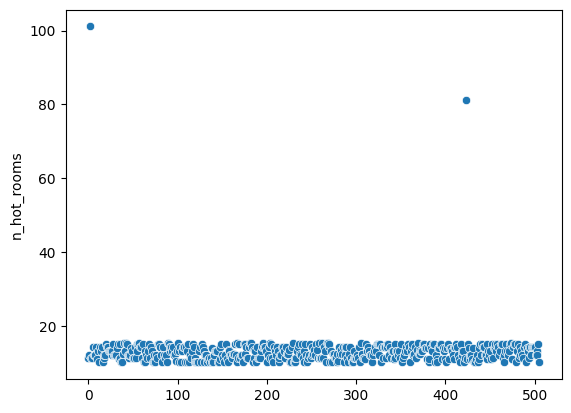

In [18]:
sns.scatterplot(df['n_hot_rooms'])

In [20]:
#removing outlier
uv = np.percentile(df['n_hot_rooms'],[99])[0]

In [21]:
uv

15.39952

In [22]:
lv= np.percentile(df['n_hot_rooms'],[1])[0]

In [24]:
df[df['n_hot_rooms']>uv] =3*uv

In [26]:
df[df['n_hot_rooms']<lv]=3*lv

In [27]:
df.head

<bound method NDFrame.head of         price  crime_rate  resid_area  air_qual  room_num       age     dist1  \
0    24.00000     0.00632    32.31000   0.53800   6.57500  65.20000   4.35000   
1    21.60000     0.02731    37.07000   0.46900   6.42100  78.90000   4.99000   
2    46.19856    46.19856    46.19856  46.19856  46.19856  46.19856  46.19856   
3    33.40000     0.03237    32.18000   0.45800   6.99800  45.80000   6.21000   
4    36.20000     0.06905    32.18000   0.45800   7.14700  54.20000   6.16000   
..        ...         ...         ...       ...       ...       ...       ...   
501  22.40000     0.06263    41.93000   0.57300   6.59300  69.10000   2.64000   
502  20.60000     0.04527    41.93000   0.57300   6.12000  76.70000   2.44000   
503  23.90000     0.06076    41.93000   0.57300   6.97600  91.00000   2.34000   
504  22.00000     0.10959    41.93000   0.57300   6.79400  89.30000   2.54000   
505  19.00000     0.04741    41.93000   0.57300   6.03000  80.80000   2.72000  

In [29]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.839480,4.351693,40.960962,1.446740,7.032543,67.467148,4.818828,4.484559,4.807622,4.472721,21.940666,13.183037,8.623077,13.346958,39.039085,0.959679
std,9.106185,10.110063,6.863467,5.869894,5.066012,28.256823,5.748000,5.795193,5.753930,5.793768,3.534343,8.060263,4.996814,4.387595,12.431756,5.943110
min,5.000000,0.006320,30.264240,0.385000,3.561000,2.900000,1.130000,0.920000,1.150000,0.730000,18.000000,1.730000,5.268000,10.104800,3.000000,0.033292
25%,17.325000,0.082492,35.130000,0.449000,5.888000,42.650000,2.300000,1.972500,2.302500,2.020000,19.800000,7.182500,6.671500,11.198800,28.000000,0.046514
50%,21.400000,0.266005,39.125000,0.538000,6.211000,75.500000,3.500000,3.235000,3.480000,3.180000,21.200000,11.570000,8.012000,13.107600,39.000000,0.053765
75%,26.350000,3.846485,48.100000,0.631000,6.635000,93.600000,5.527500,5.187500,5.545000,5.200000,23.100000,17.142500,9.189000,14.175000,50.000000,0.061619
max,50.000000,88.976200,57.740000,46.198560,46.198560,100.000000,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,60.000000,46.198560


<Axes: ylabel='n_hot_rooms'>

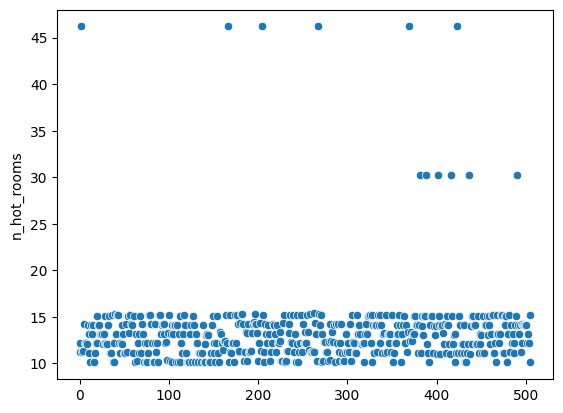

In [31]:
sns.scatterplot(df['n_hot_rooms'])

<Axes: ylabel='crime_rate'>

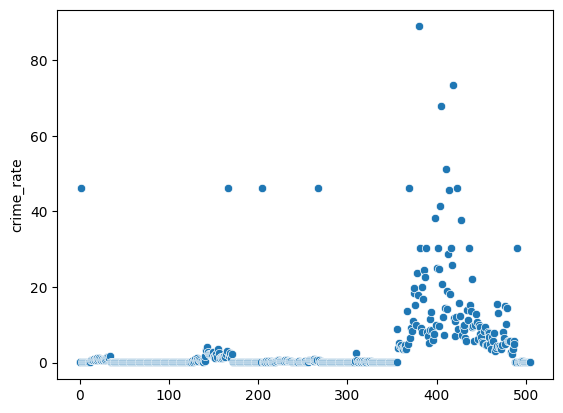

In [33]:
sns.scatterplot(df['crime_rate'])

In [34]:
uv1 = np.percentile(df['crime_rate'],[99])[0]

In [35]:
lv1 = np.percentile(df['crime_rate'],[1])[0]

In [38]:
df[(df['crime_rate']>uv1)]=3*uv1

In [39]:
df[(df['crime_rate']<lv1)]=3*lv1

<Axes: >

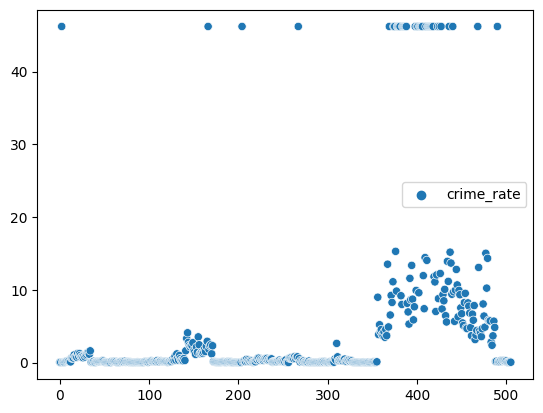

In [41]:
sns.scatterplot([df['crime_rate']])

In [44]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,teachers,poor_prop,n_hos_beds,n_hot_rooms,rainfall,parks
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,24.538518,5.286552,40.668755,3.970369,9.231087,64.675672,7.206799,6.893518,7.195949,6.882095,23.210653,14.383084,10.684211,15.067344,38.886937,3.519185
std,10.525993,12.136038,7.986600,12.045464,10.584902,28.327435,11.306466,11.393042,11.311419,11.394299,7.261250,11.013860,10.263999,9.123023,12.869379,12.173533
min,0.040831,0.013810,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.033292
25%,18.225000,0.082492,35.190000,0.449000,5.926250,43.875000,2.440000,2.125000,2.400000,2.090000,19.800000,7.037500,6.676500,11.202400,28.000000,0.046402
50%,22.000000,0.266005,39.690000,0.538000,6.251000,69.650000,3.800000,3.380000,3.775000,3.445000,21.400000,11.570000,8.105000,13.124800,40.000000,0.053860
75%,28.675000,3.846485,48.100000,0.647000,6.768000,91.675000,6.027500,5.675000,5.945000,5.642500,23.550000,17.250000,9.400500,14.199600,48.000000,0.062324
max,50.000000,46.198560,57.740000,46.198560,46.198560,100.000000,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,46.198560,60.000000,46.198560


In [45]:
df= pd.get_dummies(df)

In [46]:
del df['airport_NO']

In [47]:
del df['waterbody_None']

In [49]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,dist1,dist2,dist3,dist4,...,airport_46.19856,airport_YES,waterbody_0.0408315,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_0.0408315,bus_ter_46.19856,bus_ter_YES
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,24.538518,5.286552,40.668755,3.970369,9.231087,64.675672,7.206799,6.893518,7.195949,6.882095,...,0.075099,0.503953,0.011858,0.075099,0.175889,0.126482,0.332016,0.011858,0.075099,0.913043
std,10.525993,12.136038,7.986600,12.045464,10.584902,28.327435,11.306466,11.393042,11.311419,11.394299,...,0.263812,0.500479,0.108353,0.263812,0.381103,0.332721,0.471403,0.108353,0.263812,0.282050
min,0.040831,0.013810,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.225000,0.082492,35.190000,0.449000,5.926250,43.875000,2.440000,2.125000,2.400000,2.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,22.000000,0.266005,39.690000,0.538000,6.251000,69.650000,3.800000,3.380000,3.775000,3.445000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,28.675000,3.846485,48.100000,0.647000,6.768000,91.675000,6.027500,5.675000,5.945000,5.642500,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,50.000000,46.198560,57.740000,46.198560,46.198560,100.000000,46.198560,46.198560,46.198560,46.198560,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
df['avg_distance']=(df['dist1']+df['dist2']+df['dist3']+df['dist4'])/4

In [51]:
del df['dist1']

In [52]:
del df['dist2']

In [53]:
del df['dist3']

In [54]:
del df['dist4']

In [57]:
df.describe()

,price,crime_rate,resid_area,air_qual,room_num,age,teachers,poor_prop,n_hos_beds,n_hot_rooms,...,airport_YES,waterbody_0.0408315,waterbody_46.19856,waterbody_Lake,waterbody_Lake and River,waterbody_River,bus_ter_0.0408315,bus_ter_46.19856,bus_ter_YES,avg_distance
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,...,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,24.538518,5.286552,40.668755,3.970369,9.231087,64.675672,23.210653,14.383084,10.684211,15.067344,...,0.503953,0.011858,0.075099,0.175889,0.126482,0.332016,0.011858,0.075099,0.913043,7.044590
std,10.525993,12.136038,7.986600,12.045464,10.584902,28.327435,7.261250,11.013860,10.263999,9.123023,...,0.500479,0.108353,0.263812,0.381103,0.332721,0.471403,0.108353,0.263812,0.282050,11.350744
min,0.040831,0.013810,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,0.040831,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.040831
25%,18.225000,0.082492,35.190000,0.449000,5.926250,43.875000,19.800000,7.037500,6.676500,11.202400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.273125
50%,22.000000,0.266005,39.690000,0.538000,6.251000,69.650000,21.400000,11.570000,8.105000,13.124800,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.610000
75%,28.675000,3.846485,48.100000,0.647000,6.768000,91.675000,23.550000,17.250000,9.400500,14.199600,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,5.835625
max,50.000000,46.198560,57.740000,46.198560,46.198560,100.000000,46.198560,46.198560,46.198560,46.198560,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.198560


<Axes: >

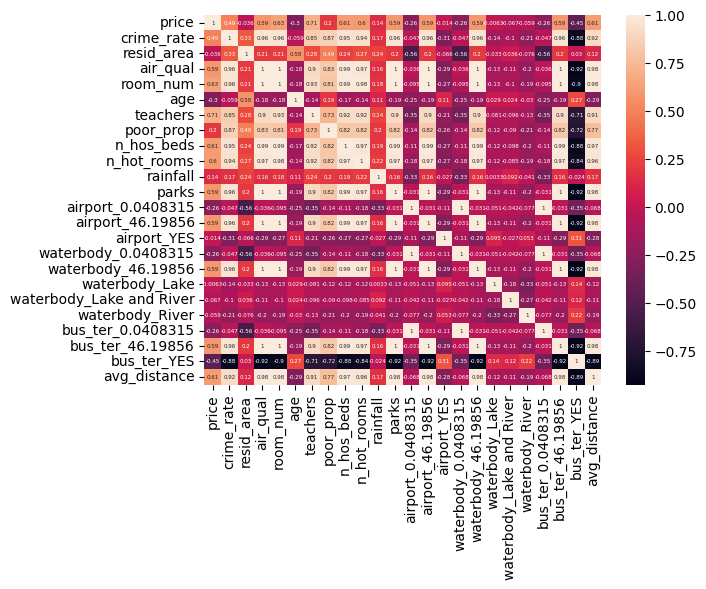

In [69]:
sns.heatmap(df.corr(),annot=True,annot_kws={"size":4})

In [82]:
#Linear Regression using number of rooms and price
x=df[['age']]

In [83]:
y=df['price']

In [84]:
lm1 = LinearRegression()

In [85]:
lm1.fit(x,y)

LinearRegression()

In [86]:
y_predict = lm1.predict(x)

In [96]:
y_predict

array([31.64010044, 22.97565797, 26.56864216, 26.61243288, 25.68950511,
       25.19507952, 24.32708792, 21.08585348, 20.6573513 , 22.20655149,
       21.28362372, 22.53616855, 27.35956489, 24.85447522, 22.36037279,
       25.4367987 , 28.42532673, 22.66801538, 27.62325854, 24.0084581 ,
       20.86610877, 21.84397272, 21.56929184, 20.6573513 , 21.30559819,
       22.22852596, 21.72311313, 21.88792166, 21.27263648, 22.0527302 ,
       21.30559819, 20.6573513 , 22.63505367, 21.20671307, 20.9979556 ,
       24.15129216, 24.89842416, 27.08488401, 28.32644161, 29.24936938,
       29.9086035 , 31.32595687, 30.91942916, 30.9304164 , 27.24969254,
       27.93090113, 27.98583731, 22.25050043, 21.17375136, 24.83250075,
       26.62342012, 24.7226284 , 29.32628003, 29.29331832, 31.64010044,
       31.64010044, 27.72214366, 27.19475636, 28.43631396, 26.45861159,
       24.37103686, 21.38250884, 24.1952411 , 26.87612653, 25.10718164,
       29.6888588 , 28.22755649, 29.29331832, 27.60128407, 28.01

In [88]:
from sklearn.metrics import r2_score

In [89]:
r2_score(y_predict,y)

-9.437597704648894

In [90]:
x2= sn.add_constant(df['age'])

In [91]:
y2=df['price']

In [92]:
lm2 = sn.OLS(y2,x2).fit()

In [93]:
y_predict1 = lm2.predict(x2)

In [97]:
r2_score(y2,y_predict1)

0.08743094711169475

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
x_train , x_test , y_train , y_test = train_test_split(x2,y2,test_size=0.2,random_state=0)

In [104]:
x_train.shape,x_test.shape,df['airport_YES'].shape

((404, 2), (102, 2), (506,))

In [105]:
##Multiple Regression

In [108]:
x_multi = df.drop("price",axis=1)

In [109]:
y_multi = df['price']

In [111]:
x_multi_1=sn.add_constant(x_multi)

In [113]:
lm3 = sn.OLS(y_multi,x_multi_1).fit()

In [114]:
y_predit_multi = lm3.predict(x_multi_1)

In [115]:
r2_score(y_multi,y_predit_multi)

0.8330157738160997

In [117]:
lm4 = LinearRegression()

In [118]:
lm4.fit(x_train,y_train)


LinearRegression()

In [119]:
y_predict_test = lm4.predict(x_test)

<Axes: >

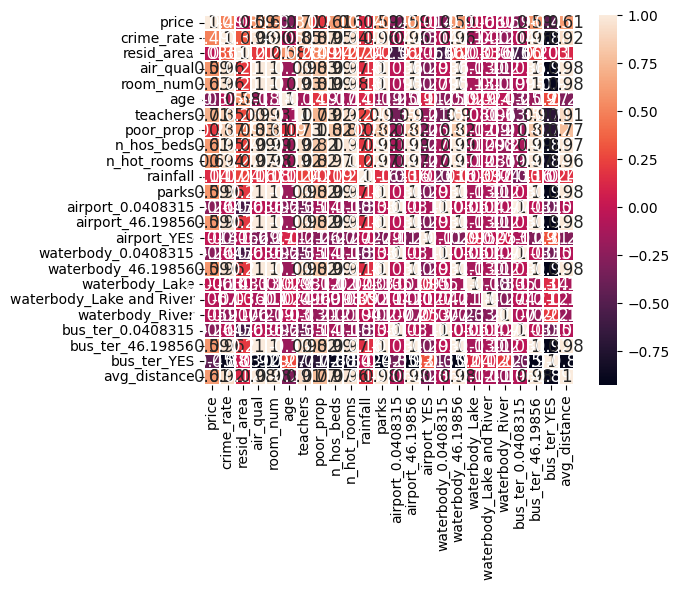

In [124]:
sns.heatmap(df.corr(),
            square = True,
            annot = True,
            linewidths=0.1,vmax=1.0, linecolor='white',
            annot_kws={'fontsize':12 })